## EDA and Preprocessing Section

In [1]:
# Must have libraries
import pandas as pd
import numpy as np

In [2]:
# First need to read in the leader and athlete datasets
athletes = pd.read_csv("bgadoci-crossfit-data/athletes.csv")
leader = pd.read_csv("bgadoci-crossfit-data/leaderboard.15.csv")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Join on athlete ID
df = pd.merge(athletes, leader, on='athlete_id', how='inner')
# Make sure it looks okay
df.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,schedule,howlong,retrieved_datetime_x,year,division,stage,rank,score,retrieved_datetime_y,scaled
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,5.0,44119.0,771.0,2015-03-31 21:47:26,0
1,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.0,43966.0,130.0,2015-03-31 23:02:54,0
2,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,1.1,32461.0,225.0,2015-03-31 23:30:57,0
3,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,2.0,58455.0,78.0,2015-03-31 23:53:31,0
4,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,I do multiple workouts in a day 2x a week|,4+ years|,NaN,15,1,3.0,30179.0,314.0,2015-04-01 00:27:51,0


In [4]:
# Drop all of our na's and check for unique values in each column
testing = df.dropna()
testing.nunique()

athlete_id               679
name                     679
region                    17
team                     574
affiliate                567
gender                     2
age                       38
height                    23
weight                   120
fran                     313
helen                    335
grace                    270
filthy50                 503
fgonebad                 247
run400                    95
run5k                    381
candj                    120
snatch                   113
deadlift                 141
backsq                   133
pullups                   80
eat                       23
train                     45
background                18
experience                43
schedule                  51
howlong                   12
retrieved_datetime_x     675
year                       1
division                   2
stage                      6
rank                    2427
score                    775
retrieved_datetime_y    2211
scaled        

#### NOTE: We noticed several variables had absurd responses: 800,000 pullups, 5,000 lb. back squat etc... So we used our best judgement to determine where the cutoff for a reasonable score on each continuous variable might be.

In [5]:
# How many rows we have before
print(len(testing))

3802


In [6]:
# Filtered Dataframes
testing = testing[testing['fran'] < 1250]
testing = testing[testing['helen'] < 2000]
testing = testing[testing['grace'] < 1000]
testing = testing[testing['filthy50'] < 4000]
testing = testing[testing['fgonebad'] < 625]
testing = testing[testing['run400'] < 200]
testing = testing[testing['run5k'] < 3000]
testing = testing[testing['candj'] < 500]
testing = testing[testing['snatch'] < 350]
testing = testing[testing['deadlift'] < 750]
testing = testing[testing['backsq'] < 750]
testing = testing[testing['pullups'] < 74]

In [7]:
# Number of rows now
print(len(testing))

3625


<AxesSubplot:>

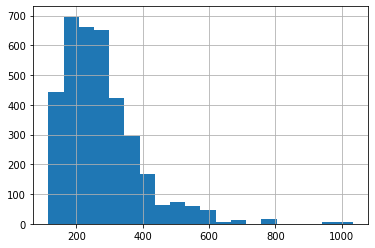

In [8]:
# Histogram to illustrate the distribution looks okay 
testing.fran.hist(bins = 20)

In [9]:
#athletes.eat.unique()

Possible values for eat:
* I eat quality foods but don't measure the amount
* I eat strict Paleo
* I eat 1-3 full cheat meals per week
* I eat whatever is convenient
* I weigh and measure my food

In [10]:
#athletes.train.unique()

Possible values for train:
* I workout mostly at a CrossFit Affiliate
* I have a coach who determines my programming
* I record my workouts
* I incorporate CrossFit.com workouts
* I write my own programming
* I workout mostly at home, work, or a traditional gym



In [11]:
#athletes.background.unique()

Possible values for background:
* I played youth or high school level sports
* I regularly play recreational sports
* I played college sports
* I have no athletic background besides CrossFit
* I played professional sports

In [12]:
#athletes.experience.unique()

Possible values for experience: 
* I began CrossFit with a coach (e.g. at an affiliate)
* I have attended one or more specialty courses
* I have had a life changing experience due to CrossFit
* I began CrossFit by trying it alone (without a coach)
* I have completed the CrossFit Level 1 certificate course
* I train other people

In [13]:
#athletes.schedule.unique()

Possible values for schedule:
* I do multiple workouts in a day 2x a week
* I usually only do 1 workout a day
* I strictly schedule my rest days
* I typically rest 4 or more days per month
* I do multiple workouts in a day 3+ times a week
* I typically rest fewer than 4 days per month
* I do multiple workouts in a day 1x a week

#### The train, background, experience, schedule and eat columns all need to be split up into different variables.

In [14]:
athletes = testing

In [15]:
# calculate dummies for train column
athletes = athletes.dropna()
a = athletes["train"].str.split('|').explode().to_frame()
cols = a["train"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["train"])[cols]], axis=1)

athletes.drop('train', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,score,retrieved_datetime_y,scaled,I workout mostly at a CrossFit Affiliate,"I workout mostly at home, work, or a traditional gym",I have a coach who determines my programming,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,498.0,2015-03-31 21:45:10,0,1,1,1,1,1,1,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,170.0,2015-03-31 22:59:41,0,1,1,1,1,1,1,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,240.0,2015-03-31 23:28:06,0,1,1,1,1,1,1,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,244.0,2015-03-31 23:52:32,0,1,1,1,1,1,1,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,340.0,2015-04-01 00:17:05,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,131.0,2015-03-31 23:23:15,1,1,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,115.0,2015-03-31 23:48:30,1,1,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,135.0,2015-04-01 00:11:44,1,1,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,533.0,2015-04-01 00:40:56,1,1,0,0,0,0,1,0


In [16]:
# calculate dummies for background column
a = athletes["background"].str.split('|').explode().to_frame()
cols = a["background"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["background"])[cols]], axis=1)

athletes.drop('background', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I incorporate CrossFit.com workouts,I write my own programming,I record my workouts,Decline to answer,I played youth or high school level sports,I regularly play recreational sports,I played college sports,I played professional sports,I have no athletic background besides CrossFit,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,1,1,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,1,0,0,1,0,0,1,0


In [17]:
# calculate dummies for experience column
a = athletes["experience"].str.split('|').explode().to_frame()
cols = a["experience"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["experience"])[cols]], axis=1)

athletes.drop('experience', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I played professional sports,I have no athletic background besides CrossFit,Decline to answer,I began CrossFit by trying it alone (without a coach),I have completed the CrossFit Level 1 certificate course,I train other people,I have attended one or more specialty courses,I have had a life changing experience due to CrossFit,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,1,0,0,0,0,0,0,1,0


In [18]:
# calculate dummies for schedule column
a = athletes["schedule"].str.split('|').explode().to_frame()
cols = a["schedule"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["schedule"])[cols]], axis=1)

athletes.drop('schedule', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I began CrossFit with a coach (e.g. at an affiliate),Decline to answer,I do multiple workouts in a day 3+ times a week,I typically rest fewer than 4 days per month,I typically rest 4 or more days per month,I usually only do 1 workout a day,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,1,0,0,0,1,1,0,0,0,0


In [19]:
# calculate dummies for eat column
a = athletes["eat"].str.split('|').explode().to_frame()
cols = a["eat"].drop_duplicates(keep='first').tolist()

athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

athletes.drop('eat', axis=1, inplace=True)    
athletes.drop('', axis=1, inplace=True)
athletes

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384130,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384131,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0
1384132,19844.0,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,...,0,0,0,0,0,0,1,0,1,0


In [20]:
athletes.head()

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,I do multiple workouts in a day 1x a week,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer
82091,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82092,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82093,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82094,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0
82095,244917.0,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
# Get dummy variables for gender
athletes["male"] = pd.get_dummies(athletes.gender)["Male"]

In [22]:
athletes.drop('athlete_id', axis=1)

,name,region,team,affiliate,gender,age,height,weight,fran,helen,...,I strictly schedule my rest days,I do multiple workouts in a day 2x a week,Decline to answer,I eat quality foods but don't measure the amount,I eat 1-3 full cheat meals per week,I eat whatever is convenient,I weigh and measure my food,I eat strict Paleo,Decline to answer,male
82091,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82092,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82093,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82094,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
82095,Andrew Hanscom,South West,CrossFit Cedar City,CrossFit Cedar City,Male,25.0,70.0,183.0,189.0,441.0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384129,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384130,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384131,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0
1384132,Valerie Foley,South West,CrossFit Initiative,CrossFit Initiative,Female,30.0,66.0,150.0,529.0,962.0,...,0,0,0,0,0,1,0,1,0,0


In [23]:
# Get rid of variables that we don't need
X = athletes.drop(['rank', 'athlete_id', 'name', 'region', 'team', 'affiliate', 'howlong', 'retrieved_datetime_x','retrieved_datetime_y', 'gender'], axis=1)
y = athletes["rank"]

In [24]:
# Train Test split
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=801)

## Decision tree model

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
# import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# split train and test
# done above

In [27]:
def PipeTree(max_depth=None):
    return make_pipeline(StandardScaler(),
                         DecisionTreeRegressor(max_depth=6, random_state=0))

In [28]:
pipe = PipeTree()
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [29]:
pipe = PipeTree(max_depth=5)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [30]:
pipe = PipeTree(max_depth=3)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [31]:
pipe.named_steps

{'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(max_depth=6, random_state=0)}

In [32]:
# takes a long time to run
param_grid = [{'decisiontreeregressor__max_depth': list(np.arange(1,50))},
             {'decisiontreeregressor__min_samples_leaf': list(np.arange(1,20))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
gs.best_params_

{'decisiontreeregressor__max_depth': 16}

In [33]:
pipe = PipeTree(max_depth=16)
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=6, random_state=0))])

In [34]:
y_hat = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
mse

159448160.3371406

In [35]:
#print(metrics.accuracy_score(y_test, y_hat))
print(pipe.score(X_test, y_test))

0.6887008313113555


## Bagging

In [36]:
# Need to import the bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
# Decision Tree Classifier (How do I add standard scaler?)
decision_tree = DecisionTreeClassifier(max_depth = 16) 
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [38]:
# Define classifier with n_estimators = 100
bag = make_pipeline(StandardScaler(),
             BaggingClassifier(base_estimator = decision_tree,
                              n_estimators = 100, n_jobs = -1))

In [39]:
# Fit the model
bag.fit(X_train,y_train)

# Make predictions
bag_pred = bag.predict(X_test)

In [40]:
# Import metrics
from sklearn import metrics

# Check the confusion matrix
metrics.confusion_matrix(y_test, bag_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
# Look at the classification report
print(metrics.classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

         9.0       0.00      0.00      0.00         0
        14.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         1
        33.0       0.00      0.00      0.00         0
        35.0       0.00      0.00      0.00         1
        43.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         0
        52.0       0.00      0.00      0.00         2
        54.0       0.00      0.00      0.00         1
        62.0       0.00      0.00      0.00         1
        72.0       0.00      0.00      0.00         1
        74.0       0.00      0.00      0.00         0
        77.0       0.00      0.00      0.00         0
        81.0       0.00      0.00      0.00         1
        83.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        95.0       0.00    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

In [42]:
# What was our accuracy with the model? 
print(metrics.accuracy_score(y_test, bag_pred))
print(bag.score(X_test, y_test))

0.21783088235294118
0.21783088235294118


In [43]:
# Calculate the mean squared error
BagMSE = mean_squared_error(y_test, bag_pred)
print(BagMSE)

282828549.2950368


In [44]:
# How does this compare to our Decision Tree MSE
mse - BagMSE

-123380388.9578962

In [45]:
# Compare our accuracy scores
print(pipe.score(X_test, y_test))
print(bag.score(X_test, y_test))

0.6887008313113555
0.21783088235294118


In [46]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [47]:
kfold = model_selection.KFold(n_splits = 15)

In [48]:
results = model_selection.cross_val_score(bag, X_train, y_train, cv = kfold)

In [49]:
print("accuracy :")
print(results.mean())

accuracy :
0.2179951270449008


## K-Nearest-Neighbors

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [52]:
athletes.columns

Index(['athlete_id', 'name', 'region', 'team', 'affiliate', 'gender', 'age',
       'height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'fgonebad',
       'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups',
       'howlong', 'retrieved_datetime_x', 'year', 'division', 'stage', 'rank',
       'score', 'retrieved_datetime_y', 'scaled',
       'I workout mostly at a CrossFit Affiliate',
       'I workout mostly at home, work, or a traditional gym',
       'I have a coach who determines my programming',
       'I incorporate CrossFit.com workouts', 'I write my own programming',
       'I record my workouts', 'Decline to answer',
       'I played youth or high school level sports',
       'I regularly play recreational sports', 'I played college sports',
       'I played professional sports',
       'I have no athletic background besides CrossFit', 'Decline to answer',
       'I began CrossFit by trying it alone (without a coach)',
       'I have completed the Cross

In [51]:
# calculate dummies for eat column
# a = athletes["eat"].str.split('|').explode().to_frame()
# cols = a["eat"].drop_duplicates(keep='first').tolist()

# athletes = pd.concat([athletes, pd.crosstab(a.index, a["eat"])[cols]], axis=1)

# athletes.drop('eat', axis=1, inplace=True)  

KeyError: 'eat'

In [53]:
def PipeKNN(neighbors=1):
    return make_pipeline(StandardScaler(),
                         KNeighborsRegressor(n_neighbors=neighbors))

In [54]:
athletes = athletes.astype({'region': 'category', 
                            'team': 'category', 
                            'gender': 'category',  
                            'affiliate': 'category'})

In [55]:
categorical_cols = ['region', 'team', 'gender', 'affiliate','howlong'] 
df_with_dummies = pd.get_dummies(athletes, columns = categorical_cols)

In [56]:
is_male =  df_with_dummies['gender_Male']==1
df_with_dummies_male = df_with_dummies[is_male]
test_column = 'run400'

In [57]:
y = df_with_dummies_male["rank"].to_numpy()

In [58]:
X = df_with_dummies_male.drop(columns = ['athlete_id','name','year','rank','retrieved_datetime_y','retrieved_datetime_x','division'])
# drop division because everyone is in division 1 for the males



In [59]:
X_1 = X[[test_column]]
#X_1

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,run400
0,105843,54.0
1,202077,73.0
2,232572,81.0
3,342273,58.0
4,580717,66.0
...,...,...
1717,375027,85.0
1718,91481,65.0
1719,683044,58.0
1720,375028,85.0


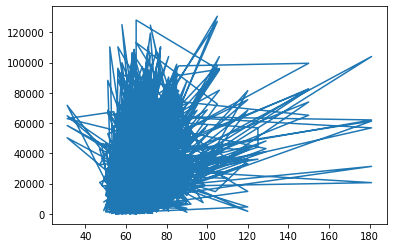

In [61]:
import matplotlib.pyplot as plt
plt.plot(X_train, y_train)

In [62]:
print(type(y_train))
print(y_train)

print(type(y))
print(y)

#print(X_train)
print(type(X_train))

# candj :)
# age, weight doesn't really give any good interpretations
# filthy50, is all over the place

<class 'numpy.ndarray'>
[29540. 73958. 55556. ... 53362. 20795. 21326.]
<class 'numpy.ndarray'>
[  6042.   9661.  22556. ... 130589. 127191.  97560.]
<class 'pandas.core.frame.DataFrame'>


In [63]:
test_column = 'run400'
X_1 = X[[test_column]]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,run400
0,105843,54.0
1,202077,73.0
2,232572,81.0
3,342273,58.0
4,580717,66.0
...,...,...
1717,375027,85.0
1718,91481,65.0
1719,683044,58.0
1720,375028,85.0


In [65]:
X_plot = pd.DataFrame(np.linspace(0,175,5000), columns=[test_column])

<AxesSubplot:xlabel='run400'>

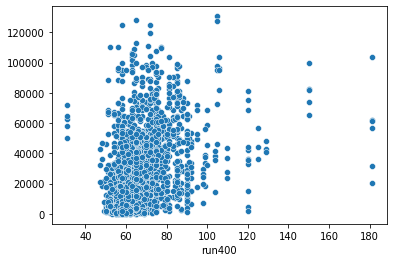

In [66]:
pipe = PipeKNN(33)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [67]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))
# Said that the best number of neighbors was 39 for run400

{'kneighborsregressor__n_neighbors': 49}
Accuracy Score: 0.16920395481149297


<AxesSubplot:xlabel='run400'>

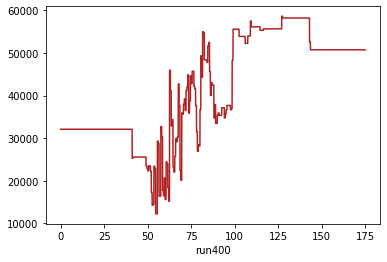

In [68]:
#run400 looks pretty good
X_plot_1 = X_plot.squeeze()
#print(X_plot)
#print(X_plot[test_column])
#print(X_plot.ndim)
#print(X_plot[test_column].ndim)
my_series = df.squeeze()
#print(type(X_plot.squeeze()))
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [69]:
test_column = 'backsq'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,backsq
0,105843,300.0
1,202077,298.0
2,232572,315.0
3,342273,375.0
4,580717,335.0
...,...,...
1717,375027,375.0
1718,91481,320.0
1719,683044,325.0
1720,375028,375.0


In [70]:
X_plot = pd.DataFrame(np.linspace(150,600,5000), columns=[test_column])

<AxesSubplot:xlabel='backsq'>

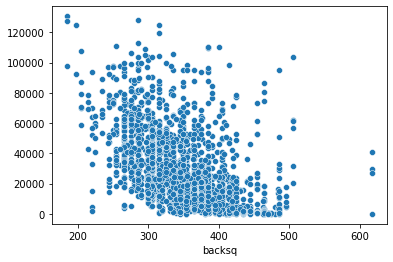

In [71]:
pipe = PipeKNN(23)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [72]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 49}
Accuracy Score: 0.22072214313636596


In [73]:
X_plot_1 = X_plot.squeeze()

[(150.0, 600.0)]

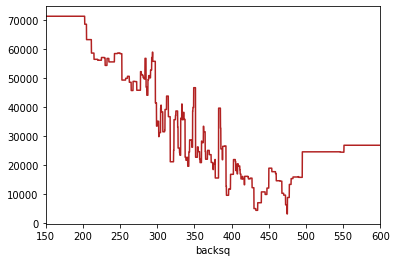

In [74]:
my_series = df.squeeze()
g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')
g.set(xlim=(150, 600))


In [75]:

test_column = 'helen'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,helen
0,105843,596.0
1,202077,660.0
2,232572,763.0
3,342273,451.0
4,580717,548.0
...,...,...
1717,375027,480.0
1718,91481,506.0
1719,683044,450.0
1720,375028,480.0


In [76]:
X_plot = pd.DataFrame(np.linspace(350,1400,5000), columns=[test_column])

<AxesSubplot:xlabel='helen'>

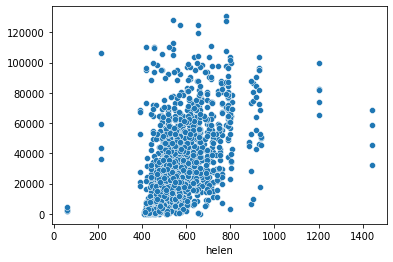

In [77]:
pipe = PipeKNN(7)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [78]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
Accuracy Score: 0.3714464056450657


In [79]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='helen'>

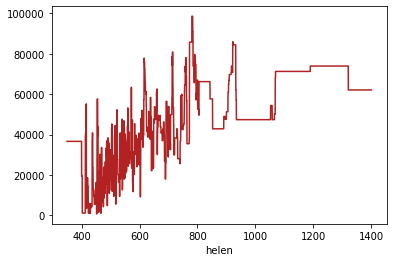

In [80]:

my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [82]:
test_column = 'fran'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,fran
0,105843,288.0
1,202077,480.0
2,232572,415.0
3,342273,156.0
4,580717,207.0
...,...,...
1717,375027,282.0
1718,91481,165.0
1719,683044,150.0
1720,375028,282.0


In [83]:
X_plot = pd.DataFrame(np.linspace(100,1000,5000), columns=[test_column])

<AxesSubplot:xlabel='fran'>

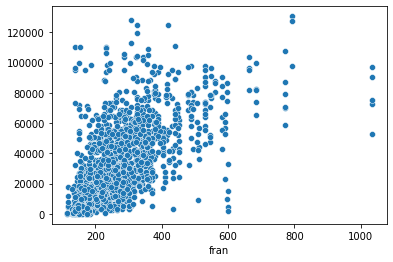

In [84]:

pipe = PipeKNN(6)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [85]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 7}
Accuracy Score: 0.47504250941091075


In [86]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='fran'>

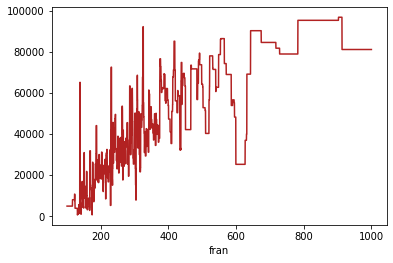

In [87]:
my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [88]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 24329.662930044477
RMSE value for k=  2 is: 19693.062350135373
RMSE value for k=  3 is: 18696.30945661601
RMSE value for k=  4 is: 18077.738298435506
RMSE value for k=  5 is: 17943.32991289306
RMSE value for k=  6 is: 18030.701646165344
RMSE value for k=  7 is: 18061.33385108583
RMSE value for k=  8 is: 18463.225677192124
RMSE value for k=  9 is: 18484.562363431018
RMSE value for k=  10 is: 18575.891343011277
RMSE value for k=  11 is: 18290.587966302635
RMSE value for k=  12 is: 18503.834931629044
RMSE value for k=  13 is: 18411.551307534726
RMSE value for k=  14 is: 18337.934759932705
RMSE value for k=  15 is: 18525.00120909883
RMSE value for k=  16 is: 18486.091042225504
RMSE value for k=  17 is: 18495.498625628534
RMSE value for k=  18 is: 18438.676307198046
RMSE value for k=  19 is: 18560.311428699333
RMSE value for k=  20 is: 18431.567639456553


<AxesSubplot:>

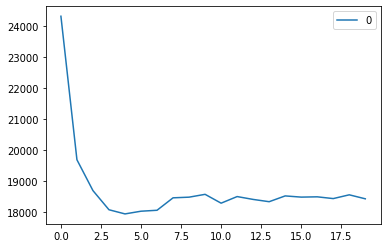

In [89]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#RMSE value for k=  5 is: 18616.41928248771
#RMSE value for k=  6 is: 18399.825278894037
#RMSE value for k=  7 is: 18510.823929253078

# The plot for the root mean squared error values
# has a corresponding elbow at 6 that does correspond 
# with what the cross validation grid search found as the 
# best parameter

In [90]:

test_column = 'run5k'
X_1 = X[[test_column]]
#print(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,run5k
0,105843,1346.0
1,202077,1380.0
2,232572,1564.0
3,342273,1260.0
4,580717,1427.0
...,...,...
1717,375027,1461.0
1718,91481,1433.0
1719,683044,1185.0
1720,375028,1461.0


In [91]:
X_plot = pd.DataFrame(np.linspace(600,2500,5000), columns=[test_column])

<AxesSubplot:xlabel='run5k'>

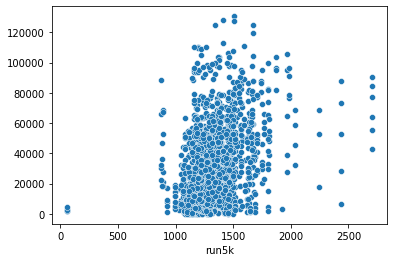

In [92]:
pipe = PipeKNN(4)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [93]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 5}
Accuracy Score: 0.2378662923234578


In [94]:
X_plot_1 = X_plot.squeeze()

[(750.0, 2500.0)]

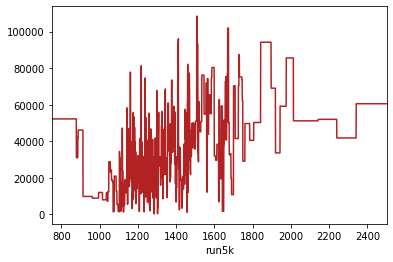

In [95]:

my_series = df.squeeze()
g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')
g.set(xlim=(750, 2500))

In [96]:
test_column = 'candj'
X_1 = X[[test_column]]


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,candj
0,105843,235.0
1,202077,187.0
2,232572,205.0
3,342273,308.0
4,580717,235.0
...,...,...
1717,375027,295.0
1718,91481,240.0
1719,683044,225.0
1720,375028,295.0


In [98]:
X_plot = pd.DataFrame(np.linspace(100,400,5000), columns=[test_column])

<AxesSubplot:xlabel='candj'>

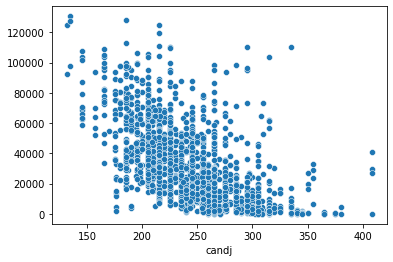

In [99]:
pipe = PipeKNN(37)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [100]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 14}
-395347110.82190573
Accuracy Score: 0.3828119598870634


In [101]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='candj'>

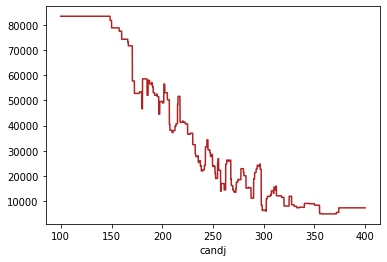

In [102]:
my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [103]:
test_column = 'weight'
X_1 = X[[test_column]]

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,weight
0,105843,195.0
1,202077,205.0
2,232572,226.0
3,342273,204.0
4,580717,185.0
...,...,...
1717,375027,235.0
1718,91481,175.0
1719,683044,150.0
1720,375028,235.0


In [105]:
X_plot = pd.DataFrame(np.linspace(100,400,5000), columns=[test_column])

<AxesSubplot:xlabel='weight'>

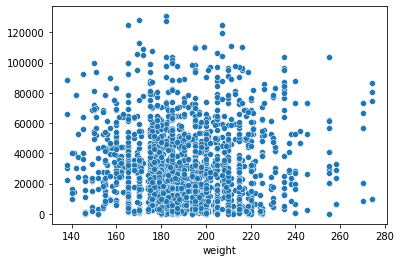

In [106]:
pipe = PipeKNN(21)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)


In [107]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 21}
Accuracy Score: 0.02361382517536781


In [108]:
X_plot_1 = X_plot.squeeze()

[(125.0, 300.0)]

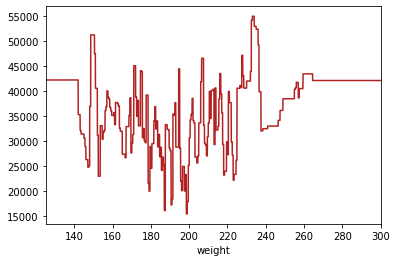

In [109]:

my_series = df.squeeze()
g = sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')
g.set(xlim=(125, 300))

In [110]:

test_column = 'age'
X_1 = X[[test_column]]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,age
0,105843,29.0
1,202077,48.0
2,232572,35.0
3,342273,33.0
4,580717,30.0
...,...,...
1717,375027,43.0
1718,91481,29.0
1719,683044,23.0
1720,375028,43.0


In [112]:
X_plot = pd.DataFrame(np.linspace(20,50,5000), columns=[test_column])

<AxesSubplot:xlabel='age'>

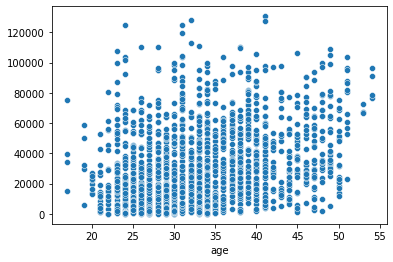

In [113]:
pipe = PipeKNN(33)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [114]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 49}
-587869888.415339
Accuracy Score: 0.1517542208935314


In [115]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='age'>

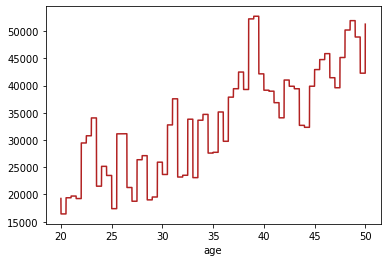

In [116]:
my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [117]:
test_column = 'age'
X_1 = X[[test_column]]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()


,index,age
0,105843,29.0
1,202077,48.0
2,232572,35.0
3,342273,33.0
4,580717,30.0
...,...,...
1717,375027,43.0
1718,91481,29.0
1719,683044,23.0
1720,375028,43.0


In [119]:
X_plot = pd.DataFrame(np.linspace(20,50,5000), columns=[test_column])

<AxesSubplot:xlabel='age'>

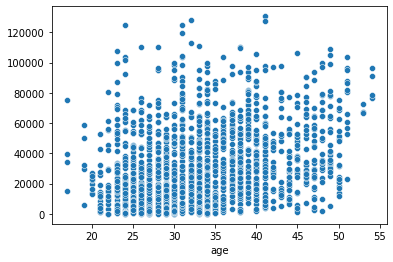

In [120]:
pipe = PipeKNN(21)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [121]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='age'>

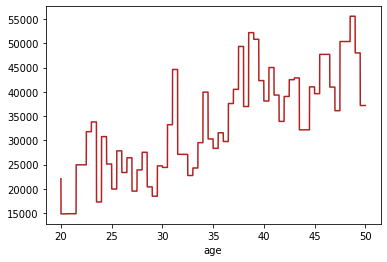

In [122]:
my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [123]:
test_column = 'deadlift'
X_1 = X[[test_column]]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,deadlift
0,105843,515.0
1,202077,364.0
2,232572,365.0
3,342273,440.0
4,580717,400.0
...,...,...
1717,375027,465.0
1718,91481,365.0
1719,683044,385.0
1720,375028,465.0


In [125]:
X_plot = pd.DataFrame(np.linspace(250,600,10000), columns=[test_column])

<AxesSubplot:xlabel='deadlift'>

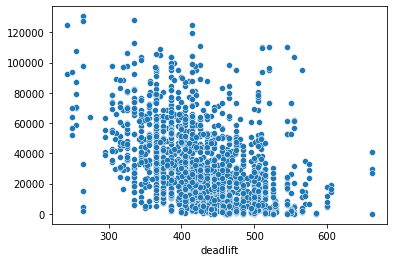

In [126]:
pipe = PipeKNN(36)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [127]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 36}
Accuracy Score: 0.24098062941938914


In [128]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='deadlift'>

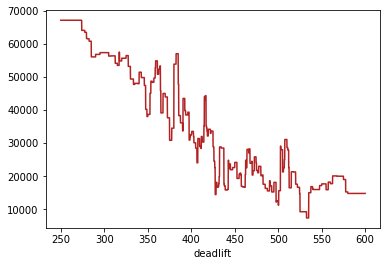

In [129]:
my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [130]:
test_column = 'filthy50'
X_1 = X[[test_column]]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,filthy50
0,105843,1404.0
1,202077,1560.0
2,232572,2027.0
3,342273,1337.0
4,580717,1310.0
...,...,...
1717,375027,1620.0
1718,91481,1306.0
1719,683044,960.0
1720,375028,1620.0


In [133]:
X_plot = pd.DataFrame(np.linspace(250,3500,5000), columns=[test_column])

<AxesSubplot:xlabel='filthy50'>

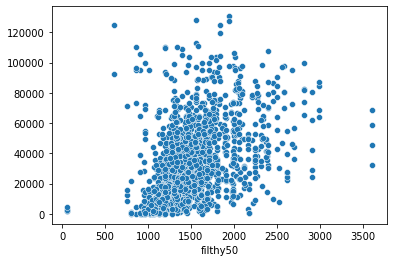

In [134]:
pipe = PipeKNN(3)
pipe.fit(X_train,y_train)
sns.scatterplot(x=X_train[test_column], y=y_train)

In [135]:
param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print(gs.best_params_)
print('Accuracy Score:', pipe.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 3}
Accuracy Score: 0.4096008295491914


In [136]:
X_plot_1 = X_plot.squeeze()

<AxesSubplot:xlabel='filthy50'>

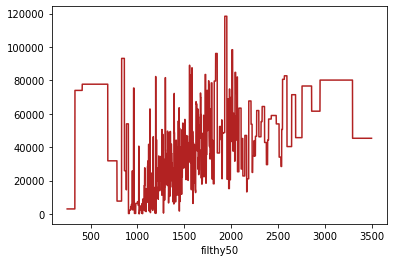

In [137]:
my_series = df.squeeze()
sns.lineplot(x=X_plot[test_column], y=pipe.predict(X_plot), color='firebrick')

In [138]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 21386.212907154666
RMSE value for k=  2 is: 19585.986012146474
RMSE value for k=  3 is: 19077.98115999651
RMSE value for k=  4 is: 18871.57616313723
RMSE value for k=  5 is: 19239.122616179226
RMSE value for k=  6 is: 19855.907131106742
RMSE value for k=  7 is: 19751.945346357857
RMSE value for k=  8 is: 19870.833761470978
RMSE value for k=  9 is: 20022.7293283611
RMSE value for k=  10 is: 20137.770960779042
RMSE value for k=  11 is: 20268.236563324008
RMSE value for k=  12 is: 20135.49327975039
RMSE value for k=  13 is: 20221.757223823828
RMSE value for k=  14 is: 20128.689900048637
RMSE value for k=  15 is: 20082.292370015126
RMSE value for k=  16 is: 20107.679726561473
RMSE value for k=  17 is: 20223.272601853234
RMSE value for k=  18 is: 20235.016850121116
RMSE value for k=  19 is: 20310.163106383727
RMSE value for k=  20 is: 20237.89198953265


['athlete_id',
 'name',
 'age',
 'height',
 'weight',
 'fran',
 'helen',
 'grace',
 'filthy50',
 'fgonebad',
 'run400',
 'run5k',
 'candj',
 'snatch',
 'deadlift',
 'backsq',
 'pullups',
 'retrieved_datetime_x',
 'year',
 'division',
 'stage',
 'rank',
 'score',
 'retrieved_datetime_y',
 'scaled',
 'I workout mostly at a CrossFit Affiliate',
 'I workout mostly at home, work, or a traditional gym',
 'I have a coach who determines my programming',
 'I incorporate CrossFit.com workouts',
 'I write my own programming',
 'I record my workouts',
 'Decline to answer',
 'I played youth or high school level sports',
 'I regularly play recreational sports',
 'I played college sports',
 'I played professional sports',
 'I have no athletic background besides CrossFit',
 'Decline to answer',
 'I began CrossFit by trying it alone (without a coach)',
 'I have completed the CrossFit Level 1 certificate course',
 'I train other people',
 'I have attended one or more specialty courses',
 'I have had a l

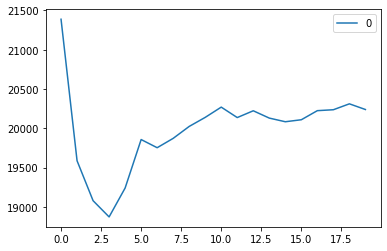

In [139]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# The plot for the root mean squared error values
# has a corresponding elbow at 3 that does correspond 
# with what the cross validation grid search found as the 
# best parameters

list(df_with_dummies.columns)

In [140]:
# This code chunk allows you to select which columns
# you would like the knn to be trained on to predict
# and then it will use a for loop to iterate through
# the different values of nearest neighbors from 1-10
num_neighbors = 10
#candj, fran, filthy50
cols = ['helen','grace','fran']
#df1 = X.iloc[:, cols]
df1 = X[cols]
#df1.head()
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size = .3, random_state=801)
X_train.reset_index()

,index,helen,grace,fran
0,105843,596.0,96.0,288.0
1,202077,660.0,360.0,480.0
2,232572,763.0,199.0,415.0
3,342273,451.0,133.0,156.0
4,580717,548.0,189.0,207.0
...,...,...,...,...
1717,375027,480.0,117.0,282.0
1718,91481,506.0,165.0,165.0
1719,683044,450.0,180.0,150.0
1720,375028,480.0,117.0,282.0


In [141]:
acc_val = [] #to store accuracy values for different L
for N in range(num_neighbors):
    N = N+1
    pipe = PipeKNN(N)
    pipe.fit(X_train,y_train)
    print('Accuracy Score:', pipe.score(X_test, y_test), ' N:', N)
    acc_val.append(pipe.score(X_test, y_test)) #store accuracy values

#param_grid = [{'kneighborsregressor__n_neighbors': list(np.arange(1,50))}] 
#gs = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error')
#gs.fit(X_train, y_train)
print(gs.best_params_)

# Some of the best results for accuracy (still fairly low)
# First 100 columns - Accuracy Score: 0.5433629491409262, L: 4

# cols = ['candj', 'fran', 'filthy50'],
# Accuracy Score: 0.561768090617294  N: 5

# cols = ['helen','grace','fran']
# Accuracy Score: 0.5623927641302024  N: 5

Accuracy Score: 0.2952913249320114  N: 1
Accuracy Score: 0.4784927604074892  N: 2
Accuracy Score: 0.5336872331847302  N: 3
Accuracy Score: 0.5566301385932606  N: 4
Accuracy Score: 0.5566286578907529  N: 5
Accuracy Score: 0.5437823030112795  N: 6
Accuracy Score: 0.546210623355853  N: 7
Accuracy Score: 0.519837971595509  N: 8
Accuracy Score: 0.5235824046248914  N: 9
Accuracy Score: 0.5245868411141158  N: 10
{'kneighborsregressor__n_neighbors': 3}


### Summary

In [143]:
# Define our model names and accuracy scores 
model_names = []
accuracy_scores = []

In [144]:
# Append our different models
model_names.append("Decision Tree")
model_names.append("Bagging")
model_names.append("K-Nearest-Neighbors")

# Append our different scores
accuracy_scores.append(0.5566301385932606)
accuracy_scores.append(0.21783088235294118)
accuracy_scores.append(0.6887008313113555)

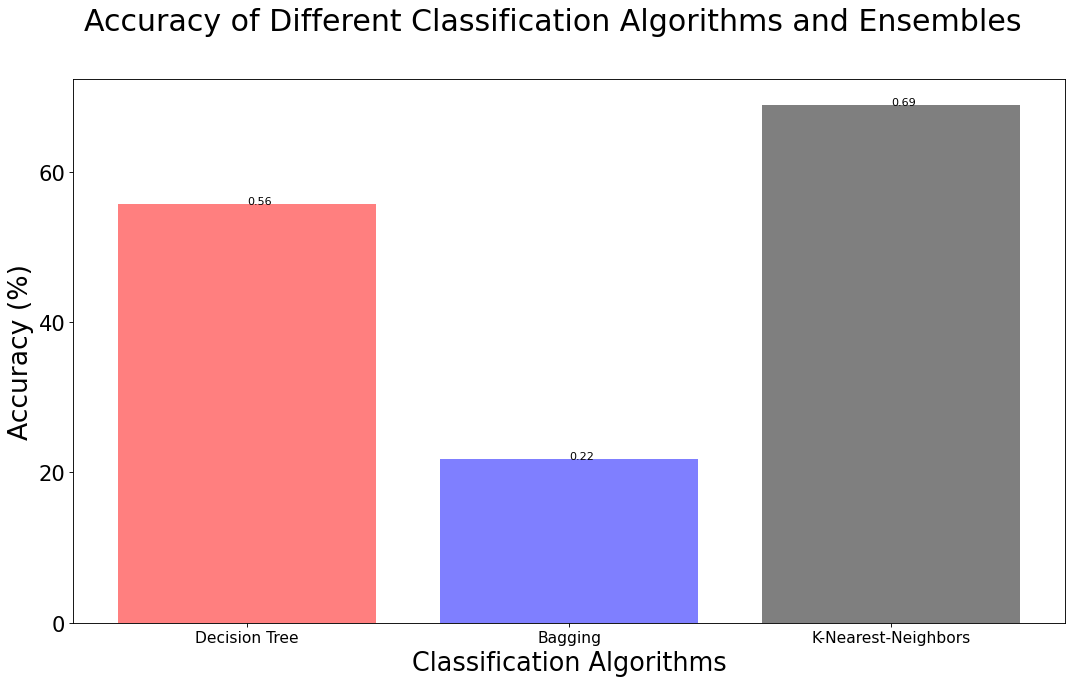

In [145]:
# All the modules we need for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Define the figure
fig = figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

# Tick marks / aesthetics
y_pos = np.arange(len(model_names))
plt.xticks(range(len(model_names)), model_names, fontsize=14)
plt.yticks([0,0.2,0.40,0.60,0.80,1.00], (0,20,40,60,80,100), fontsize=19)
colors =['r','b','k','y','m','c']

# Label size and bars
plt.rcParams['xtick.labelsize'] = 20 
barlist = plt.bar(y_pos, accuracy_scores, color=colors, align='center', alpha=0.5)

# Labels
plt.ylabel('Accuracy (%)', size = 24)
plt.xlabel("Classification Algorithms", size = 23)

# Title
plt.suptitle('Accuracy of Different Classification Algorithms and Ensembles', size = 27)
A = range(len(accuracy_scores))

# Annotate the scores
for xy in zip(A, accuracy_scores):                                     
    plt.annotate('%0.2f' % xy[1], xy = xy, textcoords='data') 

# Show everything
plt.show()